<a href="https://colab.research.google.com/github/wallik2/My_project/blob/main/DataScienceRelated/Nutritions/%231%20McDonald_Calories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0) <font color='coral'>Introduction

<b><font size="4">Context: </font></b>:

Ray Kroc wanted to build a restaurant system that would be famous for providing food of consistently high quality and uniform methods of preparation. He wanted to serve burgers, buns, fries and beverages that tasted just the same in Alaska as they did in Alabama. To achieve this, he chose a unique path: persuading both franchisees and suppliers to buy into his vision, working not for McDonald’s but for themselves, together with McDonald’s. Many of McDonald’s most famous menu items – like the Big Mac, Filet-O-Fish, and Egg McMuffin – were created by franchisees.

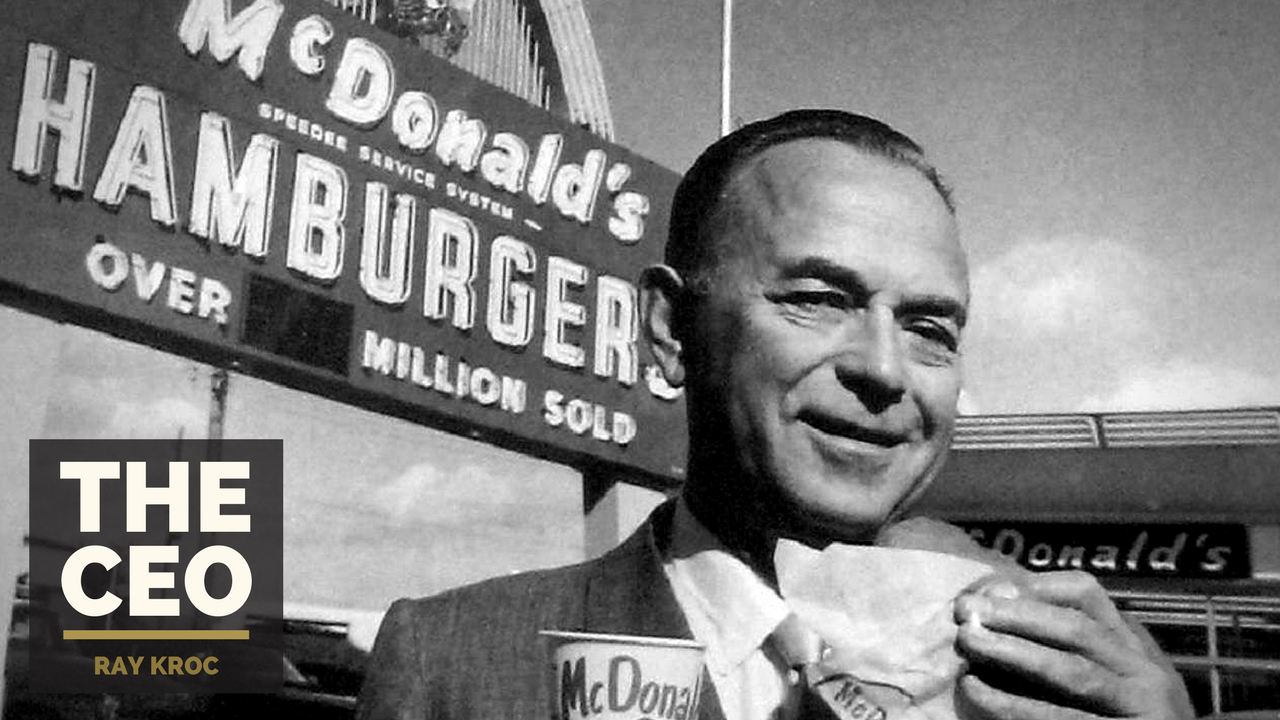



---



<b><font size="4">Content: </font></b> <br>
This dataset provides a nutrition analysis of every menu item on the US McDonald's menu, including breakfast, beef burgers, chicken and fish sandwiches, fries, salads, soda, coffee and tea, milkshakes, and desserts.



---



<b><font size="4">Acknowledgements : </font></b> <br>
The menu items and nutrition facts were scraped from the McDonald's website.



---



<font size="4"><b>Inspiration:</b> </font>

Nowaday, The calories intake is the most indicator of healthy food. We need to keep it balanced in order to make our health more fit, if we talk about eating the low calories food, we will see that McDonald is not a good choice to be relied with, however there are a lot of situation that we are forced to eat, for instance; Overslept, and the only restaurant you can find is McDonald, to skip the breakfast is really bad for you, so you have to decide which food you need to consume in order to avoid the unnecessary too much calories, Luckily, in McDonald have a plenty of choice of the low calories food, so let's explore to see

- What is the average calories of the food in each categories 
- How much do beverages, like soda or coffee, contribute to the overall caloric intake?



---



## 1) <font color='coral'>Import the dataset

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
data = pd.read_csv('/content/drive/MyDrive/dataset/MCdonald_menu.csv')

In [111]:
print('The number of column : ',len(data.columns))

print('\n\n\n',data.count())

The number of column :  24



 Category                         260
Item                             260
Serving Size                     260
Calories                         260
Calories from Fat                260
Total Fat                        260
Total Fat (% Daily Value)        260
Saturated Fat                    260
Saturated Fat (% Daily Value)    260
Trans Fat                        260
Cholesterol                      260
Cholesterol (% Daily Value)      260
Sodium                           260
Sodium (% Daily Value)           260
Carbohydrates                    260
Carbohydrates (% Daily Value)    260
Dietary Fiber                    260
Dietary Fiber (% Daily Value)    260
Sugars                           260
Protein                          260
Vitamin A (% Daily Value)        260
Vitamin C (% Daily Value)        260
Calcium (% Daily Value)          260
Iron (% Daily Value)             260
dtype: int64


In [112]:
display(data.head(3) , data.tail(3))

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,30,9,190,8,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,60,20,400,17,114,38,2,9,103,21,20,0,60,6
259,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Snack),7.1 oz (202 g),410,150,16.0,25,8.0,38,0.0,30,10,200,8,57,19,1,5,51,10,10,0,30,4


We better switch the column 'Category' & 'Item'


In [113]:
data = data.iloc[:,[1,0]+[i for i in range(2,24)]] 

In [114]:
display(data.head(3) , data.tail(3))

,Item,Category,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Egg McMuffin,Breakfast,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Egg White Delight,Breakfast,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Sausage McMuffin,Breakfast,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10


,Item,Category,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
257,McFlurry with Oreo Cookies (Snack),Smoothies & Shakes,6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,30,9,190,8,53,18,1,2,43,8,10,0,25,6
258,McFlurry with Reese's Peanut Butter Cups (Medium),Smoothies & Shakes,14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,60,20,400,17,114,38,2,9,103,21,20,0,60,6
259,McFlurry with Reese's Peanut Butter Cups (Snack),Smoothies & Shakes,7.1 oz (202 g),410,150,16.0,25,8.0,38,0.0,30,10,200,8,57,19,1,5,51,10,10,0,30,4




---



## 2) <font color='coral'>Data Exploration

In [115]:
data.describe().iloc[1:,:]

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,20.676923,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,24.034954,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,4.750000,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,36.250000,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,150.000000,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [116]:
# Split the dataset only Total ... of daily value

Index_daily_val = [0,1,6,8,11,13,15,17,20, 21,22,23]

data_Daily_values = data.iloc[:,Index_daily_val]

In [117]:
data_Daily_values.head()

,Item,Category,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Egg McMuffin,Breakfast,20,25,87,31,10,17,10,0,25,15
1,Egg White Delight,Breakfast,12,15,8,32,10,17,6,0,25,8
2,Sausage McMuffin,Breakfast,35,42,15,33,10,17,8,0,25,10
3,Sausage McMuffin with Egg,Breakfast,43,52,95,36,10,17,15,0,30,15
4,Sausage McMuffin with Egg Whites,Breakfast,35,42,16,37,10,17,6,0,25,10


In [118]:
data_Daily_values.describe().iloc[1:,:]

,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
mean,21.815385,29.965385,18.392308,20.676923,15.780769,6.530769,13.426923,8.534615,20.973077,7.734615
std,21.885199,26.639209,29.091653,24.034954,9.419544,6.307057,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,4.750000,2.000000,4.750000,10.000000,0.000000,2.000000,0.000000,6.000000,0.000000
50%,17.000000,24.000000,11.000000,8.000000,15.000000,5.000000,8.000000,0.000000,20.000000,4.000000
75%,35.000000,48.000000,21.250000,36.250000,20.000000,10.000000,15.000000,4.000000,30.000000,15.000000
max,182.000000,102.000000,192.000000,150.000000,47.000000,28.000000,170.000000,240.000000,70.000000,40.000000




---



<font size="5">Interesting Facts: </font>

1. The food that contain no fats & carbohydrate

In [119]:
data_Daily_values[(data_Daily_values['Total Fat (% Daily Value)']==0) &
                  (data_Daily_values['Carbohydrates (% Daily Value)'] ==0) ]

,Item,Category,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
114,Diet Coke (Small),Beverages,0,0,0,0,0,0,0,0,0,0
115,Diet Coke (Medium),Beverages,0,0,0,1,0,0,0,0,0,0
116,Diet Coke (Large),Beverages,0,0,0,1,0,0,0,0,0,0
117,Diet Coke (Child),Beverages,0,0,0,1,0,0,0,0,0,0
122,Diet Dr Pepper (Small),Beverages,0,0,0,3,0,0,0,0,0,0
123,Diet Dr Pepper (Medium),Beverages,0,0,0,4,0,0,0,0,0,0
124,Diet Dr Pepper (Large),Beverages,0,0,0,6,0,0,0,0,0,0
125,Diet Dr Pepper (Child),Beverages,0,0,0,2,0,0,0,0,0,0
136,Dasani Water Bottle,Beverages,0,0,0,0,0,0,0,0,0,0
137,Iced Tea (Small),Coffee & Tea,0,0,0,0,0,0,0,0,0,0




---



2. The food that contain no fats & carbohydrate have actually no fiber & vitamin &  mineral 

In [120]:
data_Daily_values['Total Vitamin & Mineral (%)'] = data_Daily_values.iloc[:,7:12].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [121]:
data_Daily_values.head()

,Item,Category,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Total Vitamin & Mineral (%)
0,Egg McMuffin,Breakfast,20,25,87,31,10,17,10,0,25,15,67
1,Egg White Delight,Breakfast,12,15,8,32,10,17,6,0,25,8,56
2,Sausage McMuffin,Breakfast,35,42,15,33,10,17,8,0,25,10,60
3,Sausage McMuffin with Egg,Breakfast,43,52,95,36,10,17,15,0,30,15,77
4,Sausage McMuffin with Egg Whites,Breakfast,35,42,16,37,10,17,6,0,25,10,58


In [122]:
data_Daily_values[(data_Daily_values['Total Fat (% Daily Value)']==0) &
                  (data_Daily_values['Carbohydrates (% Daily Value)'] ==0) & 
                  (data_Daily_values['Total Vitamin & Mineral (%)'] !=0)]

# It is not worthy to think that the food contain no fat & carb is healthy since these food have no Fiber, mineral, vitamin....

,Item,Category,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Total Vitamin & Mineral (%)




---



## 3. <font color='coral'>Answer the question

<b>Throughout this notebook we are gonna answer some interesting questions like:</b>

- What is the average calories of the food in each categories
- How much do beverages, like soda or coffee, contribute to the overall caloric intake?


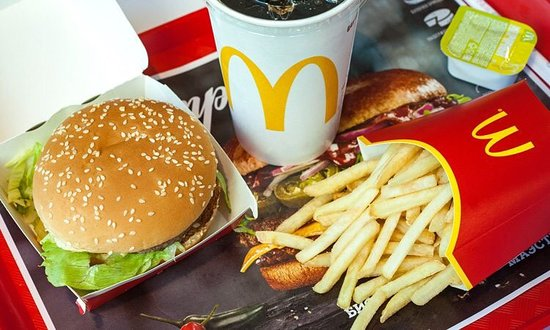

In [123]:
data.head()

,Item,Category,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Egg McMuffin,Breakfast,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Egg White Delight,Breakfast,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Sausage McMuffin,Breakfast,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Sausage McMuffin with Egg,Breakfast,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Sausage McMuffin with Egg Whites,Breakfast,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10




---



#### 1. How many calories does the average McDonald's value meal contain?

In [124]:
# 1.1) The average calories of all items in McDonald

In [125]:
data['Calories'].mean()

368.2692307692308

In [126]:
# 1.2) The average of calories of each category of item

In [127]:
Count_Categories = data['Category'].value_counts(sort=True)

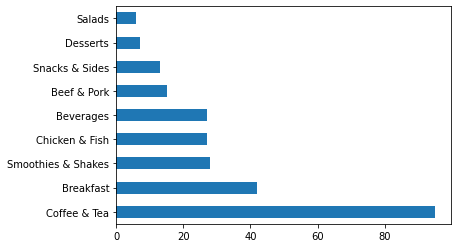

In [128]:
Count_Categories.plot.barh()

In [129]:
def Avg_Cal():

  Avg_Calories = pd.DataFrame(columns=['Category','Average of Calories','Counts'],)

  for i in list(data.Category.unique()):

    k = data[data['Category'] == i]['Calories'].mean()

    L = data[data['Category'] == i]['Category'].count()
    Avg_Calories = Avg_Calories.append([{'Category' : i, 'Average of Calories': k, 'Counts' : L }], ignore_index=True)


  Avg_Calories.sort_values("Average of Calories", axis = 0, ascending = False, inplace = True) 

  return Avg_Calories

In [130]:
Avg_Cal()

,Category,Average of Calories,Counts
2,Chicken & Fish,552.962963,27
8,Smoothies & Shakes,531.428571,28
0,Breakfast,526.666667,42
1,Beef & Pork,494.000000,15
7,Coffee & Tea,283.894737,95
3,Salads,270.000000,6
4,Snacks & Sides,245.769231,13
5,Desserts,222.142857,7
6,Beverages,113.703704,27


- <font color='cherry'> The average calories for all items are 368.26 which is fairly high </font>

- <font color='cherry'> Chicken & Fish has the highest calories comparing to other categories!! No doubt for that xD </font>

- <font color='cherry'> But the funny thing is that smoothies has more than 500 calories which is higher than Beef & Pork... I think this category name is something doesn't make sense, or Smoothies isn't that healthy when applied with McDonald. Let's check the item inside this categories



In [131]:
data[data.Category == 'Snacks & Sides']

,Item,Category,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
90,Chipotle BBQ Snack Wrap (Crispy Chicken),Snacks & Sides,4.6 oz (130 g),340,130,15.0,23,4.5,22,0.0,30,11,780,33,37,12,1,6,8,14,4,0,10,10
91,Chipotle BBQ Snack Wrap (Grilled Chicken),Snacks & Sides,4.3 oz (123 g),260,70,8.0,13,3.5,18,0.0,40,14,700,29,30,10,1,6,7,16,4,2,10,10
92,Honey Mustard Snack Wrap (Crispy Chicken),Snacks & Sides,4.3 oz (123 g),330,130,15.0,23,4.5,22,0.0,35,11,730,30,34,11,1,5,3,14,2,0,10,10
93,Honey Mustard Snack Wrap (Grilled Chicken),Snacks & Sides,4.1 oz (116 g),250,70,8.0,13,3.5,18,0.0,45,14,650,27,27,9,1,5,2,16,2,2,10,10
94,Ranch Snack Wrap (Crispy Chicken),Snacks & Sides,4.5 oz (128 g),360,180,20.0,30,5.0,27,0.0,40,13,810,34,32,11,1,5,3,15,2,0,10,10
95,Ranch Snack Wrap (Grilled Chicken),Snacks & Sides,4.3 oz (121 g),280,120,13.0,20,4.5,22,0.0,45,16,720,30,25,8,1,5,2,16,2,2,10,10
96,Small French Fries,Snacks & Sides,2.6 oz (75 g),230,100,11.0,17,1.5,8,0.0,0,0,130,5,30,10,2,10,0,2,0,30,0,4
97,Medium French Fries,Snacks & Sides,3.9 oz (111 g),340,140,16.0,24,2.5,11,0.0,0,0,190,8,44,15,4,14,0,4,0,45,2,4
98,Large French Fries,Snacks & Sides,5.9 oz (168 g),510,220,24.0,37,3.5,17,0.0,0,0,290,12,67,22,5,22,0,6,0,70,2,8
99,Kids French Fries,Snacks & Sides,1.3 oz (38 g),110,50,5.0,8,1.0,4,0.0,0,0,65,3,15,5,1,5,0,1,0,15,0,2


I think the category smoothies&shakes need to be teared apart into 2 categories, since most of the shakes really have significantly higher than smoothies!!

In [132]:
# let move the items in Smoothies & shakes apart

Smoothies_shake_index = list(data[data.Category == 'Smoothies & Shakes'].index)

In [133]:
for index in Smoothies_shake_index:
  if 'Smoothie' in data.iloc[index,0]:
    data.iloc[index,1] = 'Smoothies'
  
  else:
    data.iloc[index,1] = 'Shakes'

- <font color='cherry'> There you go, we have seperated the categories Smoothies&Shakes into Smoothies and Shakes

In [134]:
Avg_Cal()

,Category,Average of Calories,Counts
9,Shakes,655.789474,19
2,Chicken & Fish,552.962963,27
0,Breakfast,526.666667,42
1,Beef & Pork,494.000000,15
7,Coffee & Tea,283.894737,95
3,Salads,270.000000,6
8,Smoothies,268.888889,9
4,Snacks & Sides,245.769231,13
5,Desserts,222.142857,7
6,Beverages,113.703704,27


- <font color='cherry'> Now, we discovered a new fact, Shakes has the highest calories comparing to the other groups. Our smoothies are now safe from having scarily high calories </font>

- <font color='cherry'> The next thing we need to do is Should we seperated Chicken & Fish, Beef & Pork, Coffee & Team, Snacks & Sides or not!</font>

- Note: We can't seperate Chicken & Fish item if it contains both Chicken & Fish

In [135]:
data[data.Category == 'Smoothies & Shakes']

,Item,Category,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)


In [136]:
# For Chicken & Fish category, the item that has fish really have is just one (Filet-O-Fish)  

Chicken_index = [i for i in range(57,83)]

data.iloc[Chicken_index,1] = 'Chicken'

data.iloc[83,1] = 'Fish'

In [137]:
# For Beef & Pork category, we don't have to seperate, since most of items contain both Beef & Pork 

pass

In [138]:
Coffee_tea_index = list(data[data.Category == 'Coffee & Tea'].index)



In [139]:
for index in Coffee_tea_index:
  if 'Tea' in data.iloc[index,0]:
    data.iloc[index,1] = 'Tea'
  
  else:
    data.iloc[index,1] = 'Coffee'

In [140]:
data[data.Category == 'Snacks & Sides']

Snacks_index = [i for i in range(90,100)]
Sides_index = [i for i in range(100,103)]

data.iloc[Snacks_index,1] = 'Snacks'

data.iloc[Sides_index,1] = 'Sides'

In [141]:
Avg_Cal()

,Category,Average of Calories,Counts
12,Shakes,655.789474,19
2,Chicken,559.230769,26
0,Breakfast,526.666667,42
1,Beef & Pork,494.000000,15
3,Fish,390.000000,1
10,Coffee,302.413793,87
5,Snacks,301.000000,10
4,Salads,270.000000,6
11,Smoothies,268.888889,9
7,Desserts,222.142857,7




---



#### 2. How much do beverages, like soda or coffee, contribute to the overall caloric intake?

In [142]:
Avg_Cal()

,Category,Average of Calories,Counts
12,Shakes,655.789474,19
2,Chicken,559.230769,26
0,Breakfast,526.666667,42
1,Beef & Pork,494.000000,15
3,Fish,390.000000,1
10,Coffee,302.413793,87
5,Snacks,301.000000,10
4,Salads,270.000000,6
11,Smoothies,268.888889,9
7,Desserts,222.142857,7


In [143]:
data[data['Category'] == 'Beverages']

,Item,Category,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
110,Coca-Cola Classic (Small),Beverages,16 fl oz cup,140,0,0.0,0,0.0,0,0.0,0,0,0,0,39,13,0,0,39,0,0,0,0,0
111,Coca-Cola Classic (Medium),Beverages,21 fl oz cup,200,0,0.0,0,0.0,0,0.0,0,0,5,0,55,18,0,0,55,0,0,0,0,0
112,Coca-Cola Classic (Large),Beverages,30 fl oz cup,280,0,0.0,0,0.0,0,0.0,0,0,5,0,76,25,0,0,76,0,0,0,0,0
113,Coca-Cola Classic (Child),Beverages,12 fl oz cup,100,0,0.0,0,0.0,0,0.0,0,0,0,0,28,9,0,0,28,0,0,0,0,0
114,Diet Coke (Small),Beverages,16 fl oz cup,0,0,0.0,0,0.0,0,0.0,0,0,10,0,0,0,0,0,0,0,0,0,0,0
115,Diet Coke (Medium),Beverages,21 fl oz cup,0,0,0.0,0,0.0,0,0.0,0,0,20,1,0,0,0,0,0,0,0,0,0,0
116,Diet Coke (Large),Beverages,30 fl oz cup,0,0,0.0,0,0.0,0,0.0,0,0,35,1,0,0,0,0,0,0,0,0,0,0
117,Diet Coke (Child),Beverages,12 fl oz cup,0,0,0.0,0,0.0,0,0.0,0,0,15,1,0,0,0,0,0,0,0,0,0,0
118,Dr Pepper (Small),Beverages,16 fl oz cup,140,0,0.0,0,0.0,0,0.0,0,0,45,2,37,12,0,0,35,0,0,0,0,0
119,Dr Pepper (Medium),Beverages,21 fl oz cup,190,0,0.0,0,0.0,0,0.0,0,0,65,3,53,18,0,0,51,0,0,0,0,0




---

<br><br>
<b><font size="4">Fact: What's Milk Jug looks like</b></font>


Milk Jug :

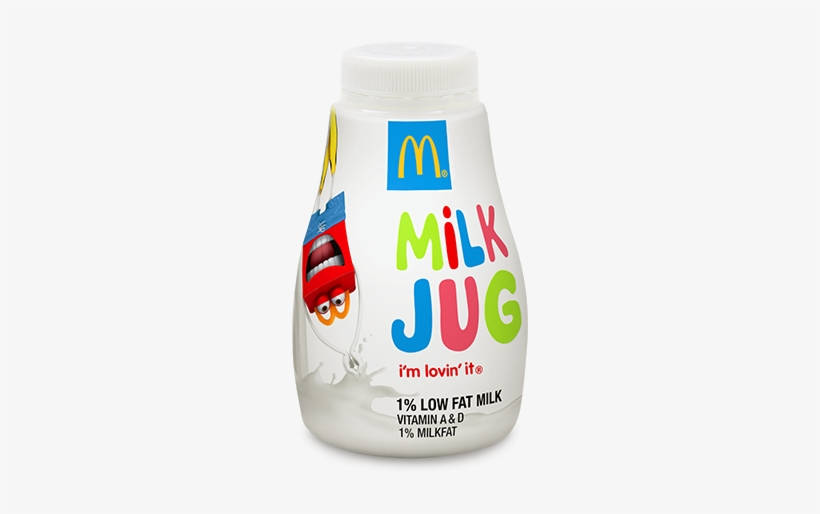



---



Items in Beverage Category contains 

- Sparkling water
- Dairy product (Low Fats)
- Fruit juice
- Water



---



#### 2.1. The average of combination of Coffee & Tea & Beverage

However, we decided to find the average of all drinking stuff type : including Coffee, Tea, and Beverage

In [144]:
A = Avg_Cal()

In [145]:
A

,Category,Average of Calories,Counts
12,Shakes,655.789474,19
2,Chicken,559.230769,26
0,Breakfast,526.666667,42
1,Beef & Pork,494.000000,15
3,Fish,390.000000,1
10,Coffee,302.413793,87
5,Snacks,301.000000,10
4,Salads,270.000000,6
11,Smoothies,268.888889,9
7,Desserts,222.142857,7


In [146]:
A_2 = A[(A.index == 8) | (A.index == 9) | (A.index == 10)]

In [147]:
A_2

,Category,Average of Calories,Counts
10,Coffee,302.413793,87
8,Beverages,113.703704,27
9,Tea,82.500000,8


In [148]:
((A_2['Average of Calories']*A_2['Counts']).sum())/(A_2['Counts']).sum()

246.2295081967213


<font color='grass'>The Average of Beverages (Tea, Coffee, Beverage) is 246.2295



---



##### 2.2. Contribution of Tea & Coffee & Beverage to the overall caloric intake?

In [149]:
A_2

,Category,Average of Calories,Counts
10,Coffee,302.413793,87
8,Beverages,113.703704,27
9,Tea,82.500000,8


In [150]:
sum_cal = A_2['Average of Calories'].sum()

A_2['contribution'] = A_2['Average of Calories']/sum_cal

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [151]:
A_2 = A_2.set_index('Category')

In [152]:
A_2

,Average of Calories,Counts,contribution
Category,,,
Coffee,302.413793,87,0.606505
Beverages,113.703704,27,0.228038
Tea,82.500000,8,0.165457


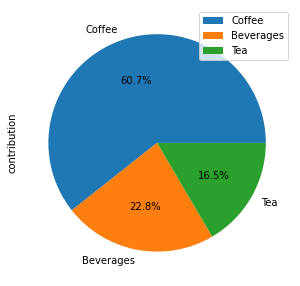

In [153]:
plot = A_2.plot.pie(y='contribution',figsize=(5, 5),autopct='%1.1f%%')


<font color='grass'>Here's the contribution of Coffee & Beverages & Tea, Most carolies intake drinking is Coffee



---



## 3. Conclusion

<fieldset>

- The categories of the given mcdonald dataset is not particularly clear categories, which in fact, we can also seperate the the categories more specifically, for instance, smoothies&shake, if we combine them together and do average between them, the true average would not be that useful compared to 'smoothies' and 'shake' apart

- After particularly discriminize the categories, we can see that overall shake give the highest calories, so consuming it might make you exceed the daily need calories per day

- while it's reasonable that Sides have overall low calories the lowest calories, however the food that is in Sides list is just 3, and the standard deviation is quite high, so this is not fair to compare the calories with the other categories, 
- So I would conclude that the safe food categories to consume if you are concerned and worried about exceeding calories daily intake amount, we recommend you to consume 'Tea', and 'Sides' and 'Beverage', and we suggest you to avoid consuming 'Beef&Pork', 'Breakfast','Chicken','Shakes'

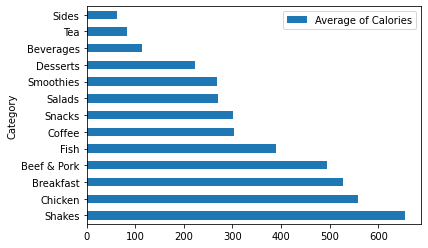

In [154]:
A.plot(x='Category', y='Average of Calories',kind='barh')



---



<fieldset>

- If you feel thirsty, and you are worried about calories then we suggest you to drink Tea, and avoid drinking Coffee (if not needed!)

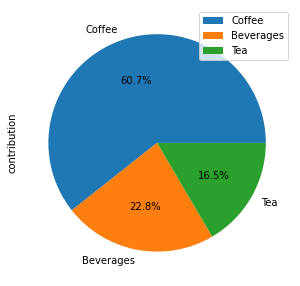

In [155]:
plot = A_2.plot.pie(y='contribution',figsize=(5, 5),autopct='%1.1f%%')



---



<fieldset>

- If you feel hungry and want to eat some, and you are worried about calories then we suggest you to eat Sides, and avoid eating especially Shakes, Chicken, Breakfast, Beef&Pork (if not needed!)

In [156]:
A_3 = A[(A.index != 8) & (A.index != 9) & (A.index != 10)]

A_3

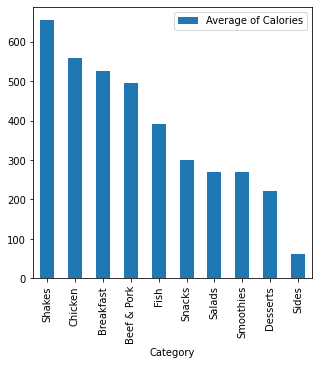

In [159]:
plot = A_3.plot(x='Category',y='Average of Calories',figsize=(5, 5),kind='bar')



---



The thing we suggested doesn't mean it's enough to determine your healthy meal, since there are more indicators to determine the best meal for you such as Nutrition like Vitamin A, B,..., Fats, Fibers, if you skip these, your health might be worse. Technically, low calories food might be not good for your healthy, if that doesn't come from natural, but instead using sweetener which it may cause the cancer in long term, so we might specify and analyze about those foods later

- So, next time, we planned to expand more using this Mcdonald Datasetin the future which maybe the best meal with the best nutrition you could possibly take. 

- We hope you find this useful to filter the food you may need to eat for your own health